In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Load the dataset
data = pd.read_csv('cities_r2.csv')
data.head(10)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,...,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932


In [3]:
data.shape

(493, 22)

In [4]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [5]:
(data == 0).sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [6]:
data.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [7]:
(data==0).sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [8]:
X = data[['effective_literacy_rate_total']]
X.head()

,effective_literacy_rate_total
0,79.86
1,91.99
2,80.51
3,83.46
4,68.38


In [9]:
# NORMALIZING THE DATA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]
# X_scaled is a scaled form of X, an ndarray -> we need this datatype for further processing

array([[-0.85297774],
       [ 1.10978383],
       [-0.74780091],
       [-0.27045988],
       [-2.71056248]])

In [10]:
linked = linkage(X_scaled, method='ward')
linked.shape

# "linked" IS A NDARRAY THAT STORES THE ROADMAP TO THE MERGING OF 493 DATAPOINTS OF X_SCALED
# HIERACHICAL CLUSTERING HAPPENS BY CLUSTERING ALL THE DATAPOINTS INTO ONE BIG CLUSTER ONE BY ONE
# HENCE TO MERGER 493 POINTS, 492 TOTAL CLUSTERING STEPS ARE REQUIRED
# THESE STEPS ARE RECORDED BY THE LINKAGE FUNCTION

(492, 4)

In [11]:
linked[:10]

array([[  0., 100.,   0.,   2.],
       [ 31.,  86.,   0.,   2.],
       [258., 340.,   0.,   2.],
       [387., 464.,   0.,   2.],
       [368., 442.,   0.,   2.],
       [ 93., 233.,   0.,   2.],
       [ 11.,  79.,   0.,   2.],
       [ 19., 213.,   0.,   2.],
       [171., 182.,   0.,   2.],
       [454., 459.,   0.,   2.]])

## MEANING OF THE linked[10, :] VALUES 

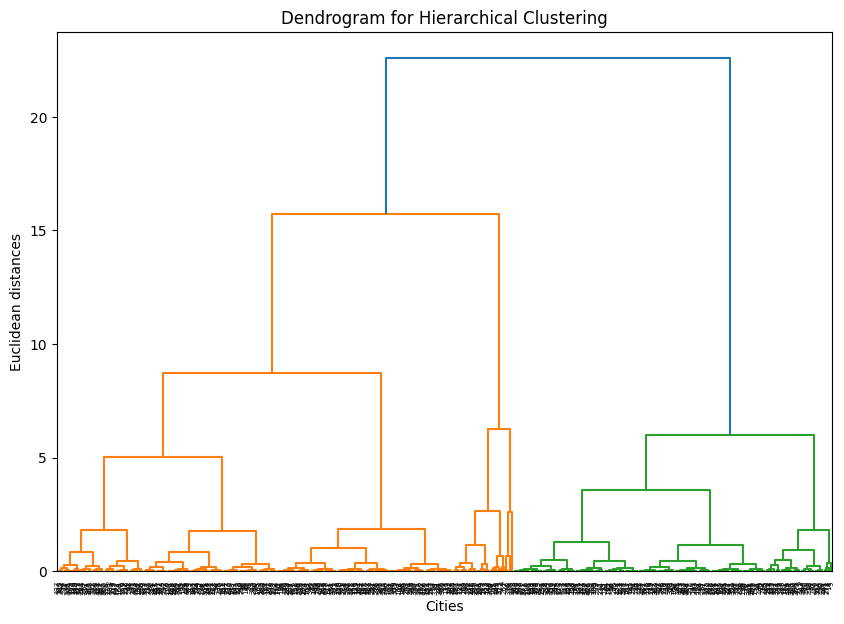

In [12]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cities')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
# Assign clusters by cutting the dendrogram at a specific height (max_d)
max_d = 10
clusters = fcluster(linked, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 2, 3, 1, 1, 2,
       1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3,
       3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 1,
       3, 3, 3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 3, 2, 1, 1, 1, 2,
       3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3,
       1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 3, 2,

In [14]:
# Add cluster labels to the original data
data['cluster'] = clusters
# Print the first few rows of the data with cluster labels
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates,cluster
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675,3
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594,1
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768,3
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036,3
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031,2


In [15]:
# Summary of effective literacy rates by cluster
cluster_summary = data.groupby('cluster')['effective_literacy_rate_total'].describe()
print(cluster_summary)

         count       mean       std    min      25%     50%      75%    max
cluster                                                                    
1        203.0  90.447291  2.333206  87.20  88.6150  90.200  91.7400  98.80
2         38.0  71.010526  5.338223  49.51  70.1025  72.815  74.5325  75.70
3        252.0  82.978611  2.956296  76.10  80.9625  83.405  85.4925  87.15
